## USING DATA TO GUIDE MOVIE PRODUCTION STRATEGY

### INTRODUCTION :

#### Movies tell stories that make us laugh , cry or think deeply . They are used for entertainment purposes , as well as educational purposes 

#### Through Data Analysis , we can move beyond subjective opinions to uncover measurable insights into the factors that drives a films success or failure 

#### This project looks at movie data to find out what makes a film popular or successful

#### By studying factors like Genre , Budget , Ratings and Box office results ,, we can discover interesting patterns and learn how different factors affect how people respond to a movie 

## BUSINESS UNDERSTANDING 
### OBJECTIVE :
##### Your company is launching a movie studio but lacks domain experience in film production. 
##### The goal is to use data to identify what types of films tend to succeed at the box office and turn these findings into actionable production strategies.


##### KEY BUSINESS QUESTIONS INCLUDE :
 1.  What genres and themes are performing the best
 2.  What are the ideal release timings ( seasons or years) for top perfoming movies
 3.  What are the audience demographics and viewing preferences associated with top performing movies
 4.  What are the emerging trends or underrepresented genres that show potential for growth
 5.  How do critic reviews versus audience reviews impact the box office success
 6.  Which actors , Directors or production companies are associated with successful movies


##### Constraints and challenges :
1. Multiple datasets with different formats and sources
2. Possible data inconsistencies in movie identifiers e.g title variations 

### DATA UNDERSTANDING 
#### OVERVIEW
##### To identify what makes a movie successful , we're working with data from five major platforms , each offering offering different slices of the cinematic picture

1. Box Office Mojo : Revenue and Earnings 
2. IMDB : Ratings , genres , cast and crew metadata
3. Rotten Tomatoes : Critic and Audience scores 
4. TheMovieDB : Popularity metrics, genre tags 
5. The Numbers : Budget , Marketing Costs , Detailed financials


##### Key Variables observed include;
1. title, release_date, genre, budget, revenue, rating, votes, runtime

2. Financial metrics: domestic_gross, worldwide_gross

3. Qualitative signals: critic_score, audience_score, popularity, franchise, sequel_flag

### DATA PREPARATION 

#### Loading the Data

In [1]:
1.1# import pandas alias
import pandas as pd 

1.2# import numpy
import numpy as np

1.3# import matplotlib .pyplot
import matplotlib.pyplot as plt
%matplotlib inline

1.4# import seaborn 
import seaborn as sns 

1.5# import sqlite for sql database
import sqlite3

1.6# import warnings and ignore
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import zipfile
import os

# extract the database from the zip file 
zip_path = "im.db.zip"
extracted_zip_path = "./im.db"

# connect to the extracted sqlite database
conn = sqlite3.connect(zip_data)

# read the tables from the database 
tables = pd.read_sql("""
SELECT name 
FROM sqlite3_master
WHERE type="table"
;""",conn)

In [2]:
import zipfile
import os
import sqlite3
import pandas as pd

# Step 1: Extract the database from the zip file
zip_path = "im.db.zip"
extract_dir = "extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 2: Locate the extracted .db file
db_filename = "im.db"  # adjust this if the filename differs
db_path = os.path.join(extract_dir, db_filename)

# Step 3: Connect to the database
conn = sqlite3.connect(db_path)

# Step 4: List the tables in the database
tables = pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type="table";
""", conn)

display(tables)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


#### data 2

In [3]:
# read the movies gross dataset
movies_gross = pd.read_csv("bom.movie_gross.csv.gz")

# view top 10
movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# dimensionality of the dataset
movies_gross.shape

(3387, 5)

In [6]:
# check for duplicates 
movies_gross.duplicated().sum()

0

In [7]:
# data information 
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
# check for column data types
movies_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [18]:
# check missing values

# total missing values per column
missing = movies_gross.isnull().sum()

# percentage of missing values
missing_percent = (missing / len(movies_gross)) * 100
missing_percent

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [24]:
# clean the studio column by dropping the missing values 
movies_gross = movies_gross.dropna(subset=["studio"])

In [25]:
movies_gross.isnull().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [27]:
# summary statistics of the movies_gross numerical columns 
movies_gross.describe()

,domestic_gross,year
count,3.356000e+03,3382.000000
mean,2.877149e+07,2013.959787
std,6.700694e+07,2.477735
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.795000e+07,2016.000000
max,9.367000e+08,2018.000000


In [28]:
movies_gross["domestic_gross"].isna().sum()

26

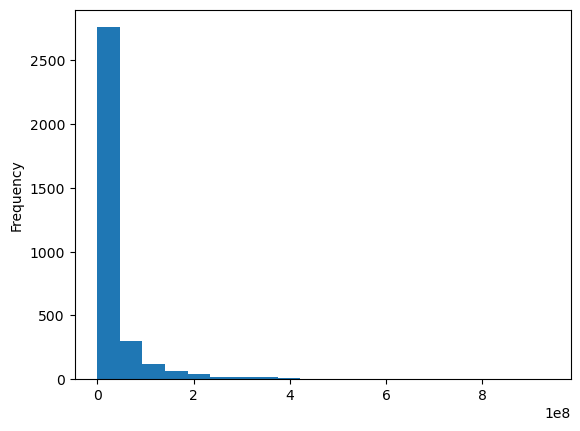

In [34]:
movies_gross["domestic_gross"].plot(kind="hist",bins=20)
plt.show()

##### the domestic_gross column is rightly skewed . It is NOT normally distributed due to outliers 

In [36]:
# fill missing values with median , less sesnsitive to outliers 

# median calculation
domestic_median = movies_gross["domestic_gross"].mean()

# fill nan with median 
movies_gross["domestic_gross"].fillna(domestic_median,inplace=True)

In [37]:
movies_gross.isnull().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64

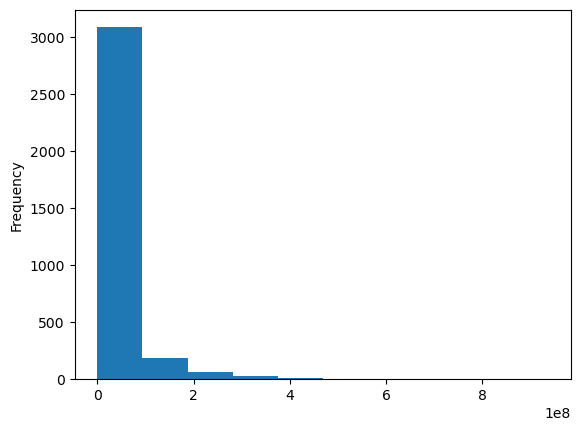

In [39]:
movies_gross["domestic_gross"].plot(kind="hist")
plt.show()

In [40]:
# cleaning the foreign gross column

In [49]:
# convert foreign gross to numeric 

movies_gross["foreign_gross"] = pd.to_numeric(
    movies_gross["foreign_gross"], errors="coerce"
).astype("Int64")

In [53]:
movies_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross       Int64
year                int64
dtype: object

In [54]:
movies_gross["foreign_gross"].describe()

count              2028.0
mean      75139698.512327
std      137633505.411442
min                 600.0
25%             3800000.0
50%            19000000.0
75%            75050000.0
max           960500000.0
Name: foreign_gross, dtype: Float64

In [55]:
# calculate the median
foreign_median = movies_gross["foreign_gross"].median()

# fill nan with the median
movies_gross["foreign_gross"].fillna(foreign_median,inplace=True)

In [56]:
movies_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

##### The dataset is now cleaned 

### Data 3

In [57]:
# load the csv file 
movie_info = pd.read_csv("rt.movie_info.tsv.gz",sep=".\t")
movie_info.head()

,i,synopsi,ratin,genr,directo,write,theater_dat,dvd_dat,currenc,box_offic,runtim,studio
0,NaN,"""This gritty, fast-paced, and innovative polic...",NaN,Action and Adventure|Classics|Dram,William Friedki,Ernest Tidyma,"Oct 9, 197","Sep 25, 200",NaN,104 minutes,None,None
1,NaN,"New York City, not-too-distant-future: Eric Pa...",NaN,Drama|Science Fiction and Fantas,David Cronenber,David Cronenberg|Don DeLill,"Aug 17, 201","Jan 1, 201",NaN,"600,00",108 minute,Entertainment One
2,NaN,"""Illeana Douglas delivers a superb performance...",NaN,Drama|Musical and Performing Art,Allison Ander,Allison Ander,"Sep 13, 199","Apr 18, 200",NaN,116 minutes,None,None
3,NaN,Michael Douglas runs afoul of a treacherous su...,NaN,Drama|Mystery and Suspens,Barry Levinso,Paul Attanasio|Michael Crichto,"Dec 9, 199","Aug 27, 199",NaN,128 minutes,None,None
4,NaN,\tN,Drama|Romanc,Rodney Bennet,Giles Coope,NaN,NaN,200 minutes,None,None,None,None


In [58]:
# shape 
movie_info.shape

(1560, 12)

In [60]:
# view column names
movie_info.columns.tolist()

['i',
 'synopsi',
 'ratin',
 'genr',
 'directo',
 'write',
 'theater_dat',
 'dvd_dat',
 'currenc',
 'box_offic',
 'runtim',
 'studio']

In [62]:
# check data structure and types
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   i            1554 non-null   float64
 1   synopsi      1557 non-null   object 
 2   ratin        979 non-null    object 
 3   genr         1535 non-null   object 
 4   directo      1403 non-null   object 
 5   write        1343 non-null   object 
 6   theater_dat  1237 non-null   object 
 7   dvd_dat      1050 non-null   object 
 8   currenc      463 non-null    object 
 9   box_offic    1021 non-null   object 
 10  runtim       447 non-null    object 
 11  studio       235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 146.4+ KB


In [63]:
# checking data types
movie_info.dtypes

i              float64
synopsi         object
ratin           object
genr            object
directo         object
write           object
theater_dat     object
dvd_dat         object
currenc         object
box_offic       object
runtim          object
studio          object
dtype: object

In [64]:
# check for nulls 
movie_info.isnull().sum()

i                 6
synopsi           3
ratin           581
genr             25
directo         157
write           217
theater_dat     323
dvd_dat         510
currenc        1097
box_offic       539
runtim         1113
studio         1325
dtype: int64

In [65]:
# check for uniqueness
movie_info.nunique()

i               201
synopsi        1500
ratin            38
genr            335
directo        1172
write          1276
theater_dat     832
dvd_dat         617
currenc         207
box_offic       464
runtim          194
studio          101
dtype: int64